# Initializing the data

In [1]:
# DO NOT IMPORT PANDAS
### Lib imports
import tree as dt
import evaluation as ev
import numpy as np
import copy
import config as cfg
import cross_val as cv
import tree_plot as tp

In [2]:
data = np.loadtxt('noisy_dataset.txt')

In [3]:
best_hyper, F1_score, err_all_hyperparams = cv.param_tuning(data, folds=10, test_percentage=0.1)

Running with hyperparameters: {'depth': 5, 'boundary': 1, 'prune': True}
-------------------- Eval/Train separation 0 --------------------
-------------------- Eval/Train separation 1 --------------------
-------------------- Eval/Train separation 2 --------------------


/home/sacha/Bureau/Imperial/Intro_to_ML/decision_tree/evaluation.py:55: RuntimeWarning: invalid value encountered in double_scalars
  prec_vect[0, i] = min(confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]),


-------------------- Eval/Train separation 3 --------------------
-------------------- Eval/Train separation 4 --------------------
-------------------- Eval/Train separation 5 --------------------
-------------------- Eval/Train separation 6 --------------------
-------------------- Eval/Train separation 7 --------------------
-------------------- Eval/Train separation 8 --------------------
-------------------- Eval/Train separation 9 --------------------
Running with hyperparameters: {'depth': 5, 'boundary': 1, 'prune': False}
-------------------- Eval/Train separation 0 --------------------
-------------------- Eval/Train separation 1 --------------------
-------------------- Eval/Train separation 2 --------------------
-------------------- Eval/Train separation 3 --------------------
-------------------- Eval/Train separation 4 --------------------
-------------------- Eval/Train separation 5 --------------------
-------------------- Eval/Train separation 6 --------------------
--

-------------------- Eval/Train separation 5 --------------------
-------------------- Eval/Train separation 6 --------------------
-------------------- Eval/Train separation 7 --------------------
-------------------- Eval/Train separation 8 --------------------
-------------------- Eval/Train separation 9 --------------------
Running with hyperparameters: {'depth': 7, 'boundary': 1, 'prune': True}
-------------------- Eval/Train separation 0 --------------------
-------------------- Eval/Train separation 1 --------------------
-------------------- Eval/Train separation 2 --------------------
-------------------- Eval/Train separation 3 --------------------
-------------------- Eval/Train separation 4 --------------------
-------------------- Eval/Train separation 5 --------------------
-------------------- Eval/Train separation 6 --------------------
-------------------- Eval/Train separation 7 --------------------
-------------------- Eval/Train separation 8 --------------------
---

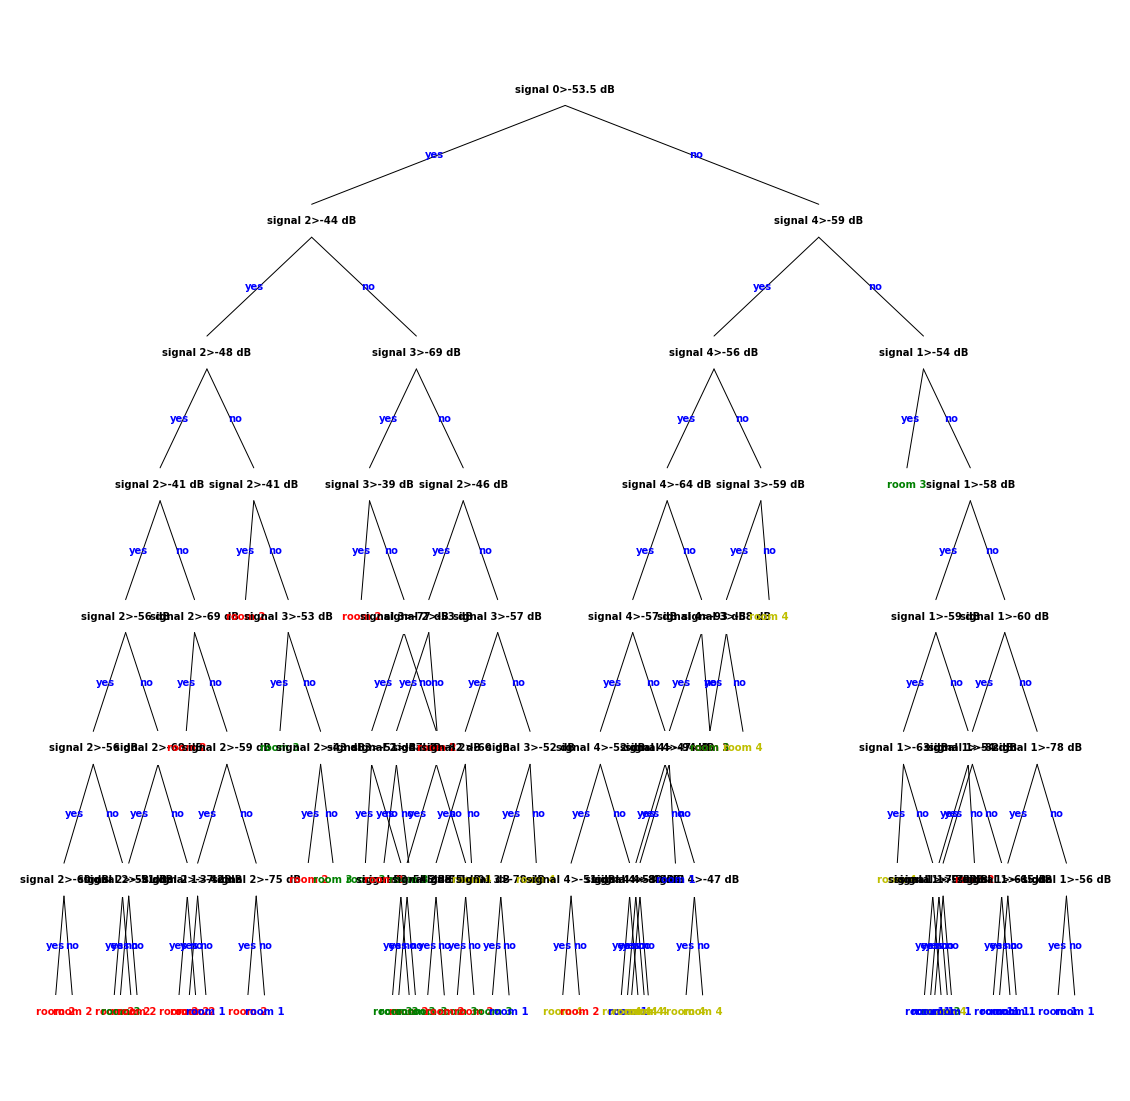

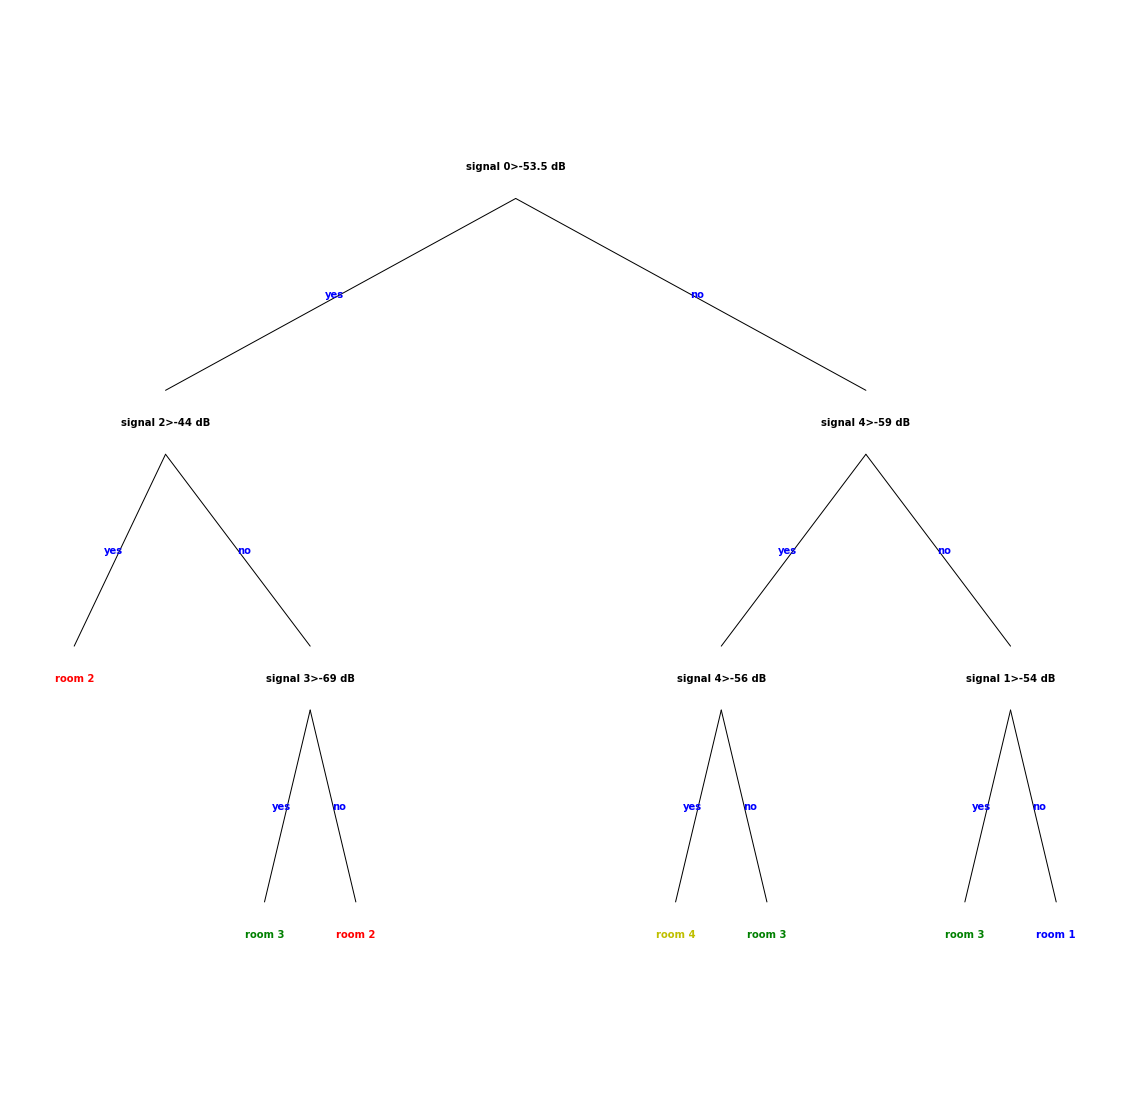

In [4]:
tp.final_plot(best_hyper)